In [1]:
set.seed(123)
getwd()
setwd("/liulab/galib/dlbcl_manuscript/")
library(rBCS)
library(tidyverse)
library(Seurat)
library(harmony)
library(viridis)
library(RColorBrewer)
library(Polychrome)
PurpleAndYellow()
library(ComplexHeatmap)
library(devtools)
library(presto)
library(dplyr)
library(ggplot2)
library(ggpubr)
library(readxl)
library(CytoTRACE2)
library(monocle3)
library(SeuratWrappers)
source("./scripts/scplot.R")

[1] "/liulab/galib/dlbcl_manuscript/scripts"

Warning message:
“package ‘rBCS’ was built under R version 4.1.3”
Warning message:
“package ‘tidyverse’ was built under R version 4.1.3”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.0      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.1 

Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
Warning message:
“package ‘forcats’ was built under R version 4.1.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching SeuratObject

Attaching sp

Warning message:
“package ‘harmony’ was built under R version 4.1.3”
Loading required package: Rcpp

Warning message:
“package ‘Rcpp’ was built under R version 4.1.2”
Loading required package: viridisLite

Warning message:
“pack

[1] "#FF00FF" "#F400F4" "#EA00EA" "#DF00DF" "#D500D5" "#CA00CA" "#BF00BF"
 [8] "#B500B5" "#AA00AA" "#9F009F" "#950095" "#8A008A" "#800080" "#750075"
[15] "#6A006A" "#600060" "#550055" "#4A004A" "#400040" "#350035" "#2B002B"
[22] "#200020" "#150015" "#0B000B" "#000000" "#000000" "#0B0B00" "#151500"
[29] "#202000" "#2B2B00" "#353500" "#404000" "#4A4A00" "#555500" "#606000"
[36] "#6A6A00" "#757500" "#808000" "#8A8A00" "#959500" "#9F9F00" "#AAAA00"
[43] "#B5B500" "#BFBF00" "#CACA00" "#D4D400" "#DFDF00" "#EAEA00" "#F4F400"
[50] "#FFFF00"

Warning message:
“package ‘ComplexHeatmap’ was built under R version 4.1.3”
Loading required package: grid

ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


Loading required package: usethis

Warning message:
“package ‘presto’ was built under R version 4.1.3”
Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The

In [3]:
B_cell<- readRDS("./data/objects/B_cell_final.rds")

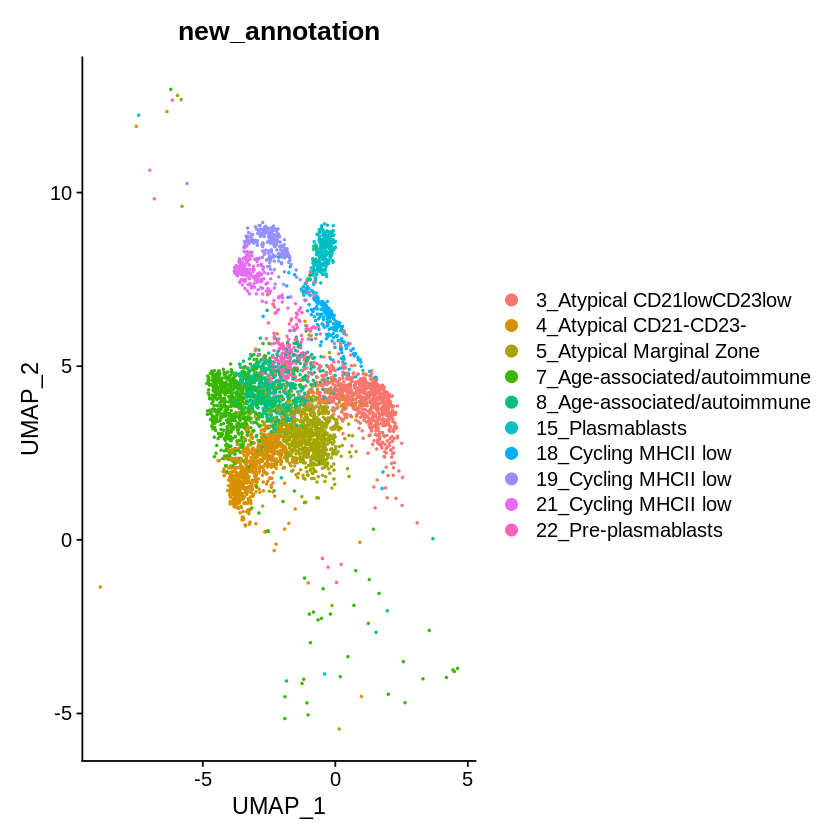

In [73]:
B_cell_subset = subset(B_cell, seurat_clusters %in% c(3, 4, 5, 7, 8, 15, 18, 19, 21, 22))
B_cell_subset<- B_cell_subset[, sample.int(ncol(B_cell_subset), size = 5000)]
DimPlot(B_cell_subset, group.by = 'new_annotation')
ggsave(paste0('./results/figures/9_monocle3_sub_clusters_with_annotation.pdf'), width = 8, height = 6)

In [18]:
message('converting to cds... ')
cds <- as.cell_data_set(B_cell_subset)
message('reducing dimension... ')
cds <- reduce_dimension(cds)
message('clustering... ')
cds <- cluster_cells(cds, resolution = 0.6)
message('learning graphs...')
cds <- learn_graph(cds)
message('plotting tree...')
plot_cells(cds, label_leaves = TRUE, label_branch_points = TRUE, cell_size = 1.2)
ggsave(paste0('./results/figures/9_monocle3_tree_sub_clusters.pdf'), width = 8, height = 6)

converting to cds... 

reducing dimension... 

No preprocess_method specified, using preprocess_method = 'PCA'

clustering... 

learning graphs...



In [ ]:
plot_cells(cds, color_cells_by = "partition")

Warning message:
“ggrepel: 268 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 271 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


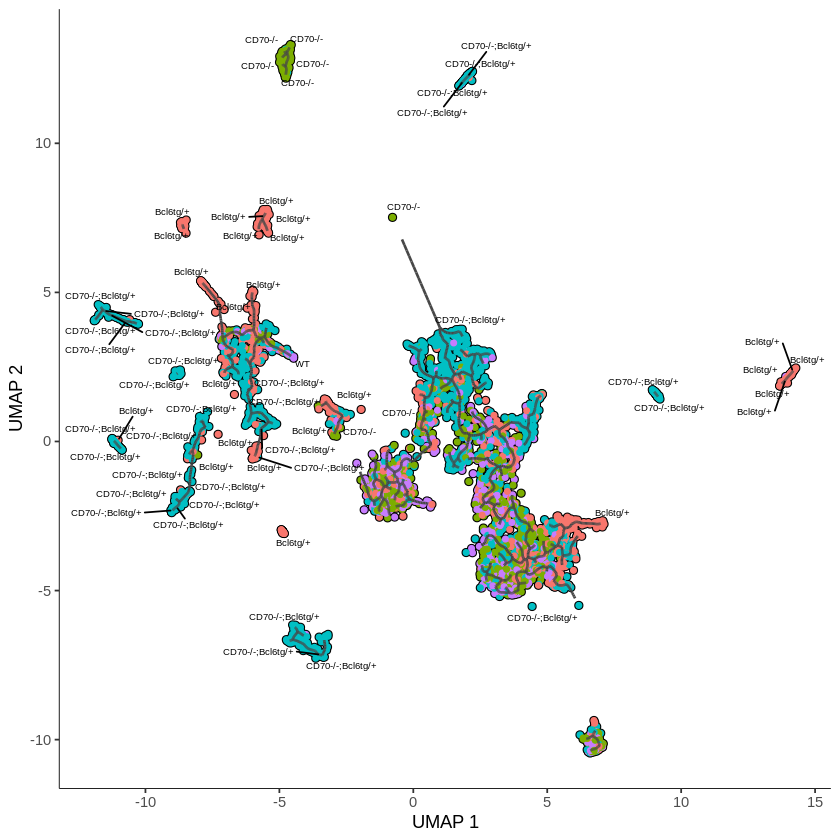

In [68]:
plot_cells(cds, color_cells_by="genotype", label_leaves = FALSE, label_roots = FALSE,
           label_branch_points = FALSE, cell_size = 1.2)
ggsave(paste0('./results/figures/9_monocle3_tree_sub_clusters_color_by_genotype.pdf'), width = 8, height = 6)
plot_cells(cds, color_cells_by="sample_id", label_leaves = FALSE, label_roots = FALSE,
           label_branch_points = FALSE, cell_size = 1.2)
ggsave(paste0('./results/figures/9_monocle3_tree_sub_clusters_color_by_sample_id.pdf'), width = 8, height = 6)
plot_cells(cds, color_cells_by="new_annotation", label_leaves = FALSE, label_roots = FALSE,
           label_branch_points = FALSE, cell_size = 1.2)
ggsave(paste0('./results/figures/9_monocle3_tree_sub_clusters_color_by_annotation.pdf'), width = 8, height = 6)

ranking cells

plotting pseudotime



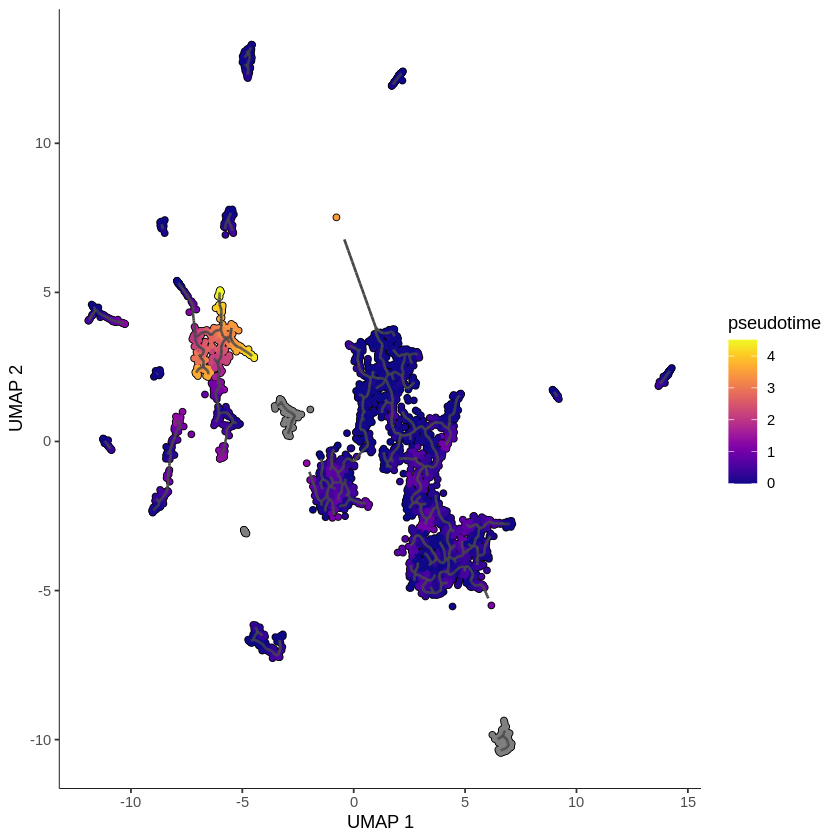

In [72]:
message('ranking cells')
root = B_cell_subset@meta.data  %>% filter(new_annotation== '5_Atypical Marginal Zone')  %>% rownames()
cds <- order_cells(cds, root_cells = root)


message('plotting pseudotime')
plot_cells(cds, color_cells_by = "pseudotime", label_cell_groups = FALSE, label_leaves = FALSE, 
    label_branch_points = FALSE, label_roots = FALSE, cell_size = 1.0)
ggsave(paste0('./results/figures/9_monocle3_pseudotime_sub_clusters.pdf'), width = 8, height = 6)

In [81]:
message('plotting pseudotime on featureplot')

B_cell_subset@meta.data$pseudotime = pseudotime(cds)[rownames(B_cell_subset@meta.data)]
B_cell_subset@meta.data[names(pseudotime(cds)[is.infinite(pseudotime(cds))]), 'pseudotime'] = NA

plotting pseudotime on featureplot



In [25]:
p<- FeaturePlot(B_cell_subset, "pseudotime")
ggsave(filename = paste0('./results/figures/9_monocle3_pseudotime_sub_clusters_featureplot.pdf'), plot = p, width = 8, height = 6)

In [130]:
B_cell_subset@meta.data$UMAP_1<- B_cell_subset@reductions$umap@cell.embeddings[,1]
B_cell_subset@meta.data$UMAP_2<- B_cell_subset@reductions$umap@cell.embeddings[,2]

In [131]:
B_cell_subset$pseudotime  %>% quantile(na.rm=TRUE)

0%        25%        50%        75%       100% 
0.00000000 0.01523656 0.13189676 0.46105700 4.50593669

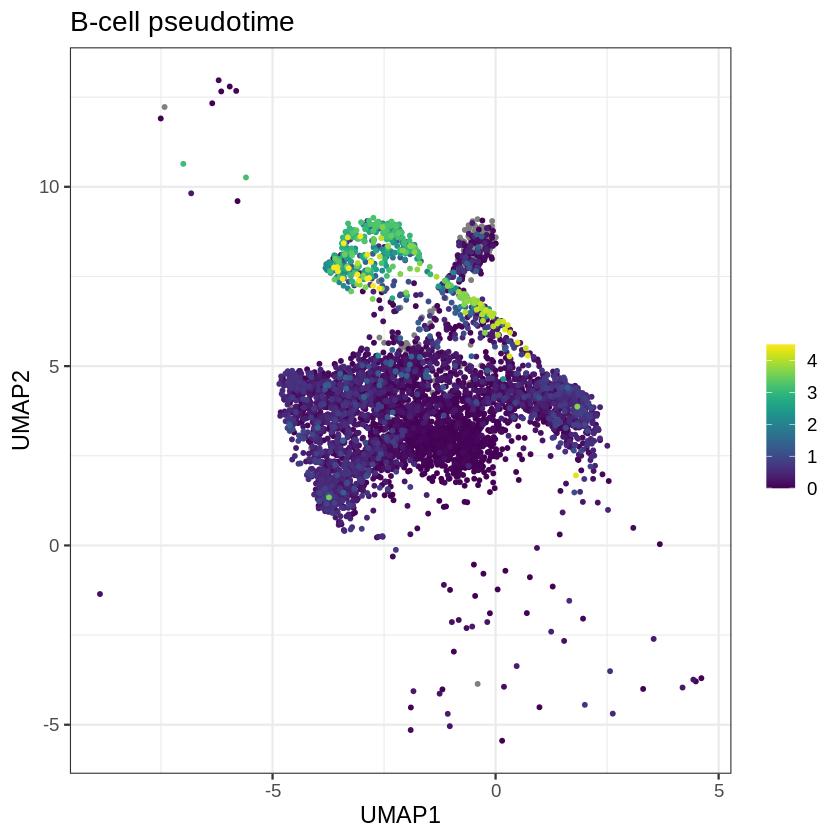

In [132]:
mycol = rev(brewer.pal(11,"RdYlBu"))
mycol = brewer.pal(9,"YlOrRd")
B_cell_subset@meta.data %>%
    mutate(age = factor(age, levels = c("6mos", "14mos", "18mos", "sick")))  %>% 
    mutate(genotype = factor(genotype, levels = c("WT", "CD70-/-", "Bcl6tg/+", "CD70-/-;Bcl6tg/+")))  %>%
    mutate(is_na= !is.na(pseudotime)) %>%
    arrange(is_na, pseudotime)  %>%
    ggplot(aes(x = UMAP_1, y= UMAP_2)) +
    geom_point(aes(color = pseudotime), size = 1.0) +
    scale_color_viridis() +
    theme_bw(base_size = 14) +
    labs(x = "UMAP1", y = "UMAP2", title = "B-cell pseudotime") +
    theme(legend.title=element_blank())

ggsave("./results/figures/9_monocle3_pseudotime_sub_clusters_umap.pdf", width = 6, height =5)

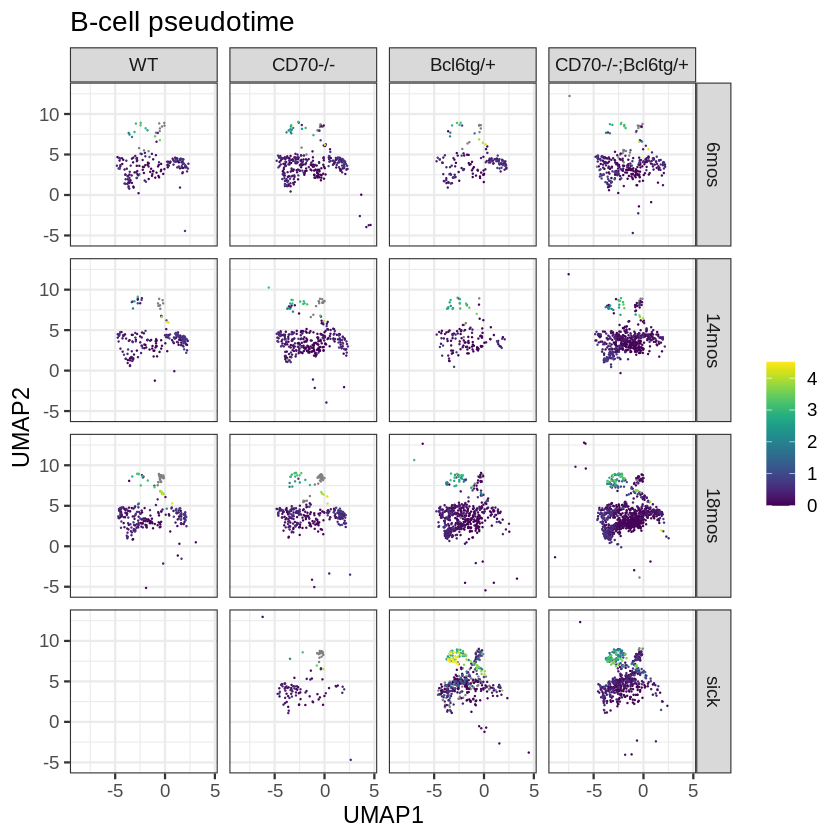

In [133]:
mycol = rev(brewer.pal(11,"RdYlBu"))
mycol = brewer.pal(11,"RdYlBu")
B_cell_subset@meta.data %>%
    mutate(age = factor(age, levels = c("6mos", "14mos", "18mos", "sick")))  %>% 
    mutate(genotype = factor(genotype, levels = c("WT", "CD70-/-", "Bcl6tg/+", "CD70-/-;Bcl6tg/+")))  %>%
    mutate(is_na= !is.na(pseudotime)) %>%
    arrange(is_na, pseudotime)  %>%
    ggplot(aes(x = UMAP_1, y= UMAP_2)) +
    geom_point(aes(color = pseudotime), size = 0.05) +
    scale_color_viridis() +
    theme_bw(base_size = 14) +
    labs(x = "UMAP1", y = "UMAP2", title = "B-cell pseudotime") +
    theme(legend.title=element_blank()) +
    facet_grid(age ~ genotype)

ggsave("./results/figures/9_monocle3_pseudotime_sub_clusters_umap_by_age_by_genotype.pdf", width = 9, height =6)

In [121]:
order = B_cell_subset@meta.data  %>% 
    group_by(new_annotation)  %>% 
    dplyr::summarize(mean = mean(pseudotime, na.rm=TRUE))  %>% 
    arrange(mean)  %>% pull(new_annotation)

Warning message:
“Removed 279 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 279 rows containing missing values (geom_point).”
Warning message:
“Removed 279 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 279 rows containing missing values (geom_point).”


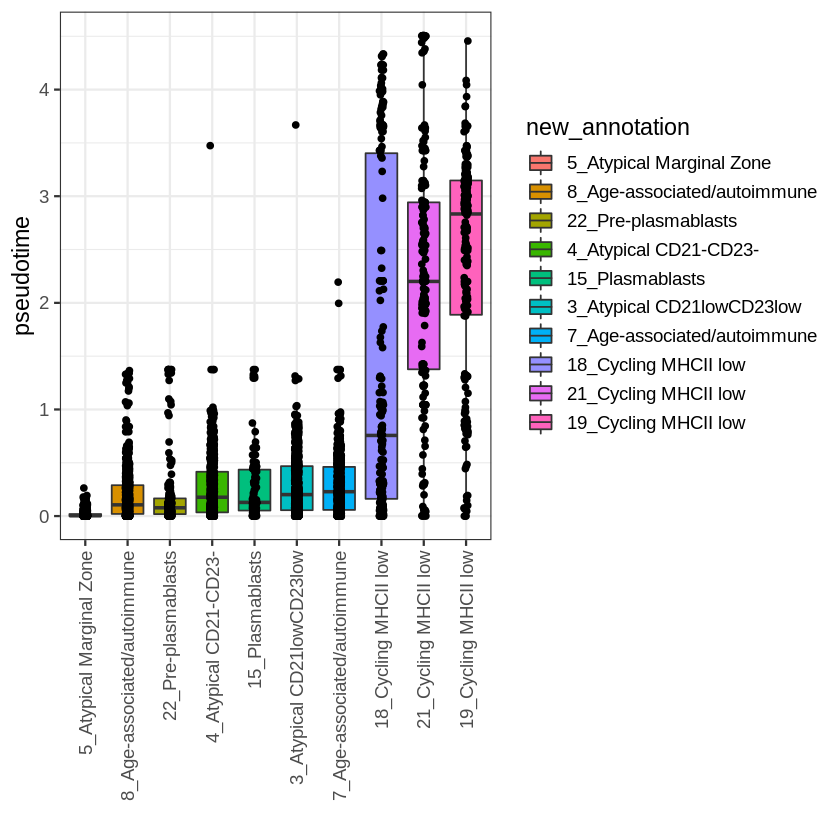

In [127]:
B_cell_subset@meta.data  %>% 
    mutate(new_annotation = factor(new_annotation, levels = order))  %>% 
    ggplot(aes(x = new_annotation, y = pseudotime)) +
    geom_boxplot(aes(fill = new_annotation), outlier.colour = "NA") +
    geom_jitter(width = 0.05) +
    theme_bw(base_size = 14) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
    labs(x = '')

ggsave("./results/figures/9_monocle3_pseudotime_sub_clusters_boxplot.pdf", width = 9, height =6)

In [ ]:
getwd()
setwd("/liulab/galib/mouse_scRNAseq_margaret/")
library(rBCS)
library(tidyverse)
library(Seurat)
library(here)
library(harmony)
library(viridis)
library(RColorBrewer)
library(Polychrome)
PurpleAndYellow()
library(ComplexHeatmap)
library(devtools)
library(presto)
library(dplyr)
library(ggplot2)
library(ggpubr)
library(monocle)
library(aplot)
library(Polychrome)

In [140]:
B_cell_subset$annotation<- str_replace_all(B_cell_subset$annotation, "Naïve", "Naive")
B_cell_subset$new_annotation<- str_replace_all(B_cell_subset$new_annotation, "Naïve", "Naive")
B_cell_subset$new_annotation<- as.character(B_cell_subset$new_annotation)

data.frame(colnames(B_cell_subset), B_cell_subset@meta.data$new_annotation) %>%
write_tsv("./data/stream/B_cell_subset_5000_label.tsv", col_names = FALSE)

library(reticulate)
library(SeuratDisk)
library(sceasy)

library(sceasy)
library(reticulate)
use_condaenv('env_stream')
loompy <- reticulate::import('loompy')
sceasy::convertFormat(B_cell_subset, from="seurat", to="anndata",
            outFile='./data/stream/B_cell_subset_5000.h5ad')

Warning message:
“package ‘reticulate’ was built under R version 4.1.3”
Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

Warning message in .regularise_df(obj@meta.data, drop_single_values = drop_single_values):
“Dropping single category variables:type, project, DF.classifications, filter”


AnnData object with n_obs × n_vars = 5000 × 32285
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample_id', 'age', 'genotype', 'gender', 'frozen_cells_x106', 'clonality', 'spl_g', 'flow', 'id', 'index', 'pool_id', 'date', 'dir', 'percent.mt', 'RNA_snn_res.1.5', 'seurat_clusters', 'pANN_DoubletFinder', 'HEX_code', 'annotation', 'new_annotation', 'pseudotime', 'UMAP_1', 'UMAP_2'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_pca', 'X_harmony', 'X_umap'

In [153]:
B_cell_subset@meta.data[is.na(B_cell_subset@meta.data$pseudotime),] %>% dplyr::count(genotype)

genotype,n
<chr>,<int>
Bcl6tg/+,122
CD70-/-,71
CD70-/-;Bcl6tg/+,46
WT,40


In [156]:
B_cell_subset@meta.data[is.na(B_cell_subset@meta.data$pseudotime),] %>% dplyr::count(new_annotation, genotype)

new_annotation,genotype,n
<chr>,<chr>,<int>
15_Plasmablasts,Bcl6tg/+,31
15_Plasmablasts,CD70-/-,59
15_Plasmablasts,CD70-/-;Bcl6tg/+,24
15_Plasmablasts,WT,37
18_Cycling MHCII low,Bcl6tg/+,1
21_Cycling MHCII low,Bcl6tg/+,4
22_Pre-plasmablasts,Bcl6tg/+,18
22_Pre-plasmablasts,CD70-/-,9
22_Pre-plasmablasts,CD70-/-;Bcl6tg/+,12


In [155]:
B_cell_subset@meta.data[is.na(B_cell_subset@meta.data$pseudotime),] %>% dplyr::count(age)

age,n
<chr>,<int>
14mos,34
18mos,70
6mos,48
sick,127
